In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow.keras.utils import to_categorical


a. Loading and preprocessing the image data

In [ ]:
mnist_train=pd.read_csv('./mnist_train.csv')

x_train=mnist_train.drop('label',axis=1).values
y_train=mnist_train['label'].values

print(x_train.shape)
print(y_train.shape)
mnist_train.head()

(60000, 784)
(60000,)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mnist_test=pd.read_csv('./mnist_test.csv')
x_test=mnist_test.drop('label',axis=1).values
y_test=mnist_test['label'].values

print(x_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)


In [ ]:
# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the images to a 1D array (for MNIST)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

b. Defining the model's architecture

In [ ]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


c. Training the model

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.9004 - loss: 0.3218 - val_accuracy: 0.9830 - val_loss: 0.0484
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9840 - loss: 0.0494 - val_accuracy: 0.9896 - val_loss: 0.0320
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9893 - loss: 0.0334 - val_accuracy: 0.9894 - val_loss: 0.0325
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.9919 - loss: 0.0249 - val_accuracy: 0.9890 - val_loss: 0.0336
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.9948 - loss: 0.0163 - val_accuracy: 0.9895 - val_loss: 0.0320
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9958 - loss: 0.0132 - val_accuracy: 0.9891 - val_loss: 0.0345
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9966 - loss: 0.0100 - val_accuracy: 0.9898 - val_loss: 0.0380
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9976 -

d. Estimating the model's performance

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Test accuracy:',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9872 - loss: 0.0557
Test accuracy: 0.9904000163078308


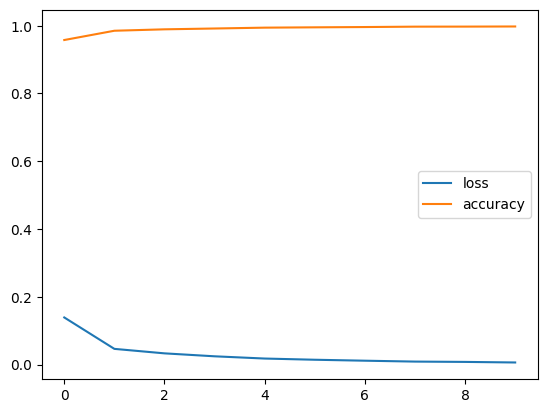

In [ ]:
plt.plot(history.history['loss'],label=('loss'))
plt.plot(history.history['accuracy'],label=('accuracy'))
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Actual Number:  0
Predicted Number:  0


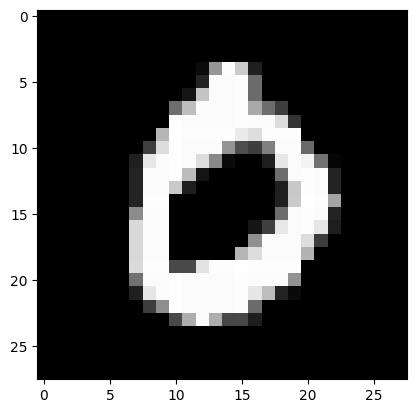

In [ ]:
n = 3
plt.imshow(x_test[n].reshape(28, 28), "gray")

predicted_value = model.predict(x_test)

print("Actual Number: ",np.argmax(y_test[n]))
print("Predicted Number: ", np.argmax(predicted_value[n]))